<a href="https://colab.research.google.com/github/naveenk-DS/Mini-Project---Student_score/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data Set**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
url = "/content/StudentsPerformance.csv"

In [10]:
df = pd.read_csv(url)

In [11]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [12]:
df.shape

(1000, 8)

In [13]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# **Data Cleaning**

In [18]:
print("This UR Null Value:\n",df.isnull().sum())

This UR Null Value:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [19]:
df.duplicated().sum()

np.int64(0)

In [25]:
df = df.rename(columns={'parental level of education': 'level_of_education', 'test preparation course': 'course','race/ethnicity': 'Groub'})

In [27]:
print("Cleaned columns:", df.columns.tolist())

Cleaned columns: ['gender', 'Groub', 'level_of_education', 'lunch', 'course', 'math score', 'reading score', 'writing score']


# **Feature Engineering**

In [29]:
# Create average and total score columns
df['total_score'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)
df['average_score'] = df['total_score'] / 3

In [30]:
df.head()

,gender,Groub,level_of_education,lunch,course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# **EDA**

In [31]:
df.describe().sum()

,0
math score,1381.252080
reading score,1408.769192
writing score,1398.999657
total_score,2186.083978
average_score,1395.361326


In [32]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [33]:
df[['math score', 'reading score', 'writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


# **Data Visualization**

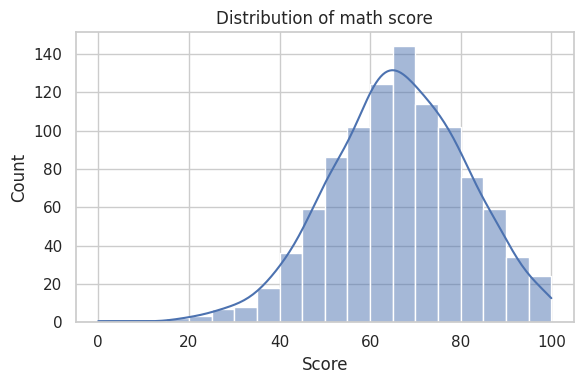

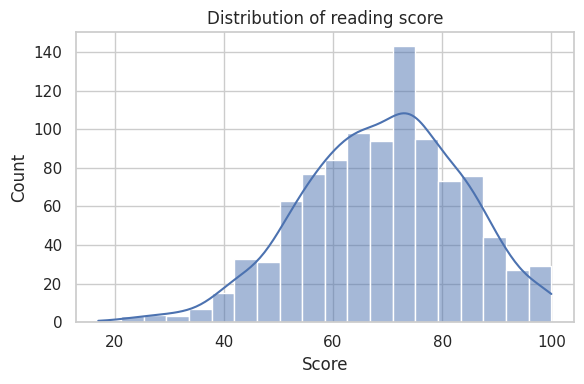

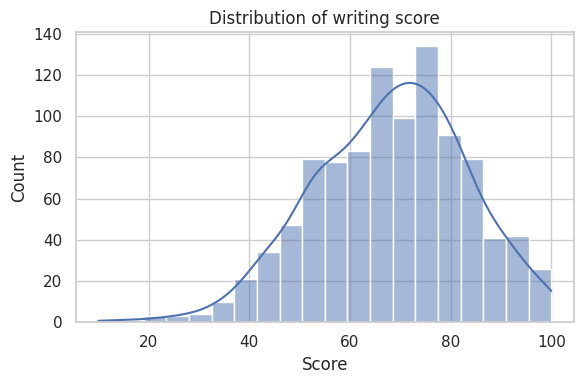

In [35]:

sns.set(style='whitegrid')

# 1. Score Distribution
for col in ['math score', 'reading score', 'writing score']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

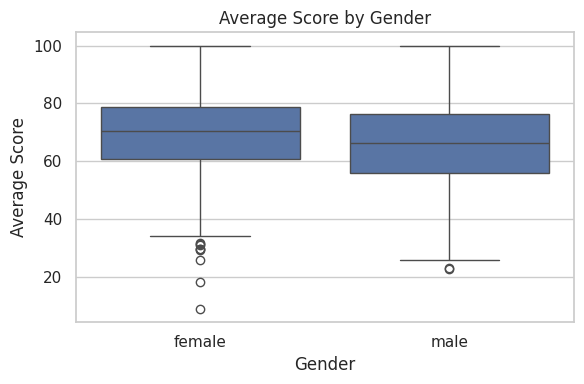

In [39]:
# 2.Boxplot by gender
plt.figure(figsize=(6, 4))
sns.boxplot(x='gender', y='average_score', data=df)
plt.title('Average Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

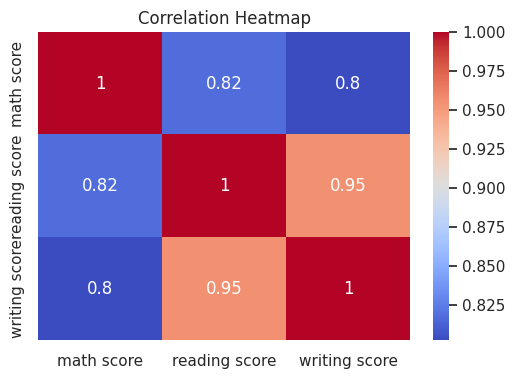

In [40]:
# 3.correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# **ML Model**

In [41]:
# Feature and Target
x = df[['math score', 'reading score', 'writing score']]
y = df['average_score']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [45]:
y_pred=model.predict(x_test)

In [46]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 4.042281050533508e-28
R² Score: 1.0
